<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# End-of-Day Analysis with Alphalens

Alphalens is an open-source performance analysis library which pairs well with the Pipeline API. In this notebook we will use Alphalens to analyze whether our momentum factor is predictive of forward returns. 

> Using Alphalens makes sense when you believe your end-of-day Pipeline rules have alpha. In contrast, if your Pipeline rules simply perform a basic screen and the alpha is entirely provided by your intraday trading rules, it might make more sense to omit this step. 

Let's re-run our pipeline from the previous notebook:

In [1]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume, Returns
from zipline.research import run_pipeline

pipeline = Pipeline(
    columns={
        "returns": Returns(window_length=252),
    },
    screen=AverageDollarVolume(window_length=30) > 10e6
)

factors = run_pipeline(pipeline, start_date="2018-01-01", end_date="2020-01-01")

To see if our momentum factor is predictive of forward returns, we use the factor data to request forward returns for the corresponding assets and dates, then format the factor and returns data for use with Alphalens:

In [2]:
from zipline.research import get_forward_returns
import alphalens as al

# Get forward returns (this provides forward 1-day returns by default)
forward_returns = get_forward_returns(factors)

# format the data for Alphalens
al_data = al.utils.get_clean_factor(
    factors["returns"], 
    forward_returns, 
    quantiles=2 # For a very small sample universe, you might only want 2 quantiles 
)

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Then we create a tear sheet to look at the factor. For a predictive factor, the higher quantiles should perform better than the lower quantiles.

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.618646,0.396696,-0.022298,0.198475,2012,55.457552
2,-0.107355,0.963271,0.284124,0.176375,1616,44.542448


Returns Analysis


,1D
Ann. alpha,0.131
beta,-0.110
Mean Period Wise Return Top Quantile (bps),1.072
Mean Period Wise Return Bottom Quantile (bps),-1.002
Mean Period Wise Spread (bps),2.075


<Figure size 1152x432 with 0 Axes>

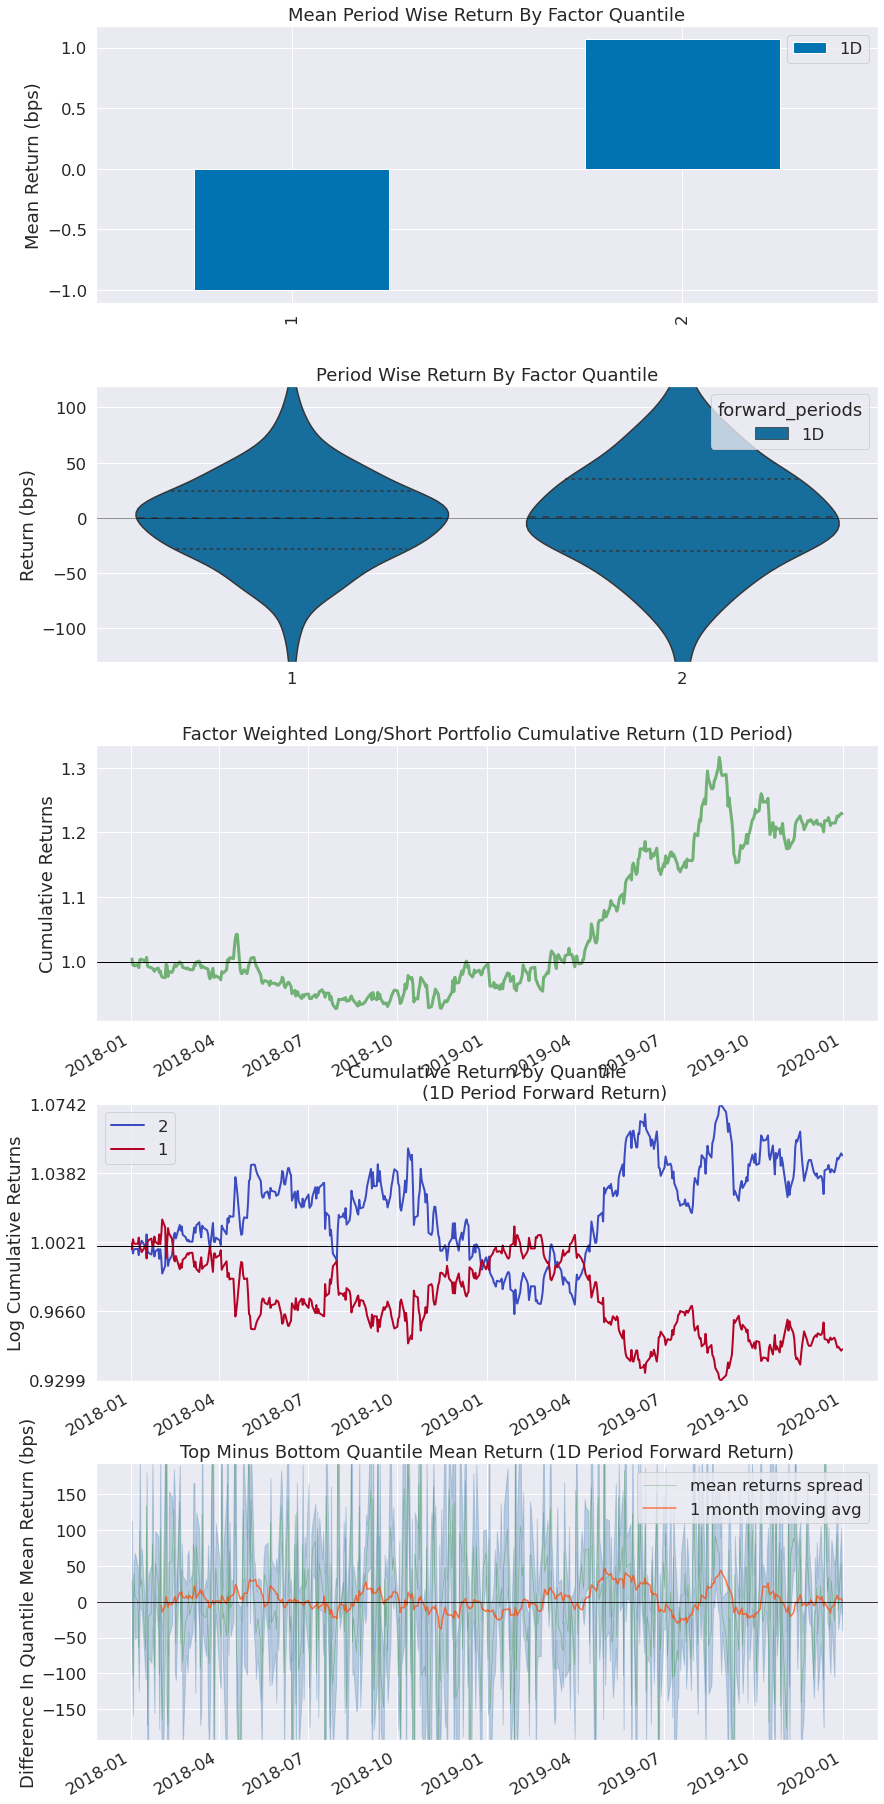

Information Analysis


,1D
IC Mean,0.034
IC Std.,0.462
Risk-Adjusted IC,0.073
t-stat(IC),1.640
p-value(IC),0.102
IC Skew,-0.014
IC Kurtosis,-0.897


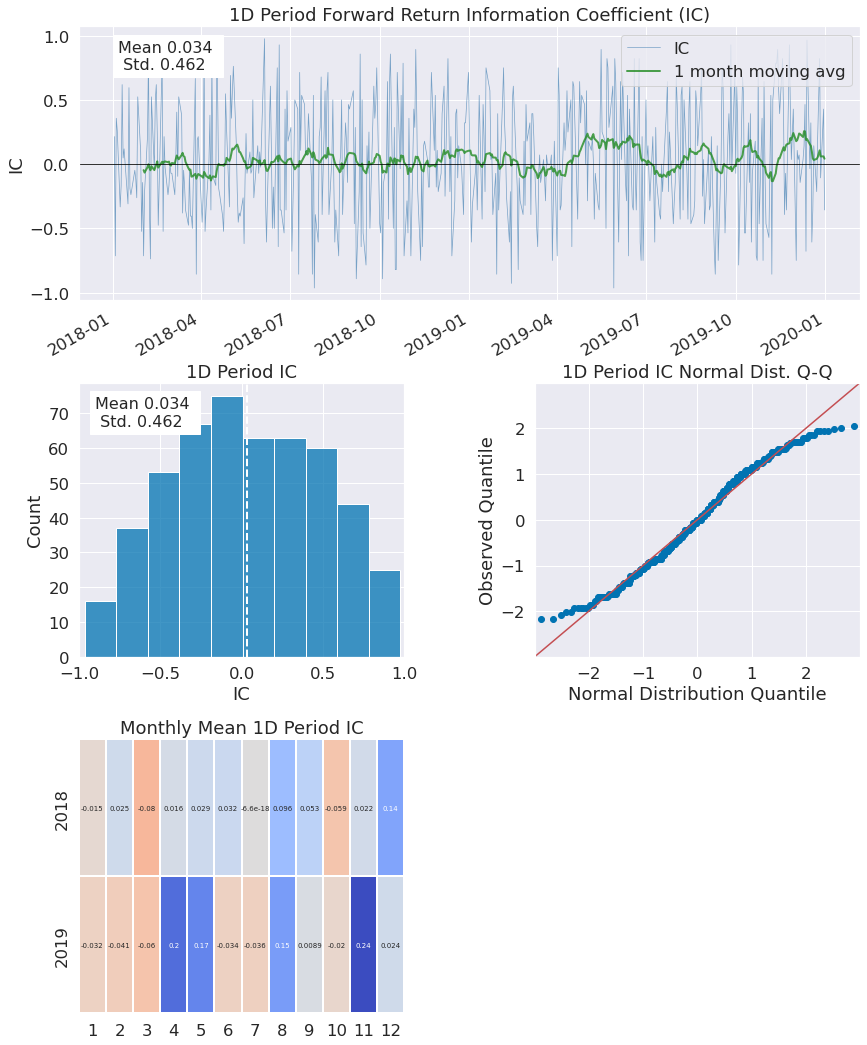

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.042
Quantile 2 Mean Turnover,0.056


,1D
Mean Factor Rank Autocorrelation,0.979


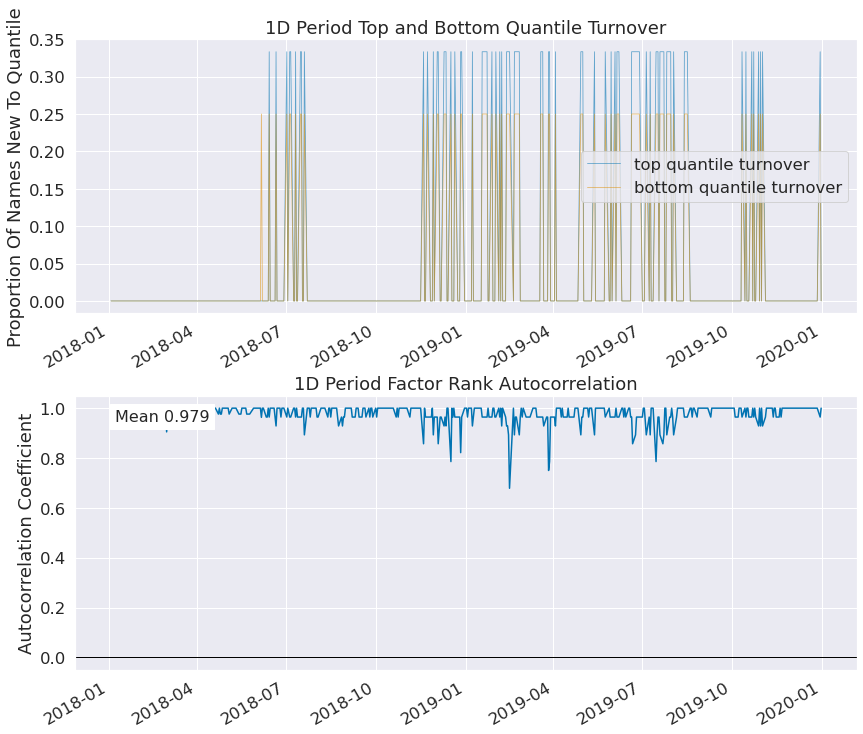

In [3]:
from alphalens.tears import create_full_tear_sheet
create_full_tear_sheet(al_data)

***

## *Next Up*

Part 4: [Intraday Trading Rules](Part4-Intraday-Trading-Rules.ipynb)